In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
df = pd.read_csv("House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [5]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df.iloc[409:411]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
409,Plot Area,Ready To Move,Sultan Palaya,2 Bedroom,NaN,550,1.0,1.0,62.0
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.5


# Performing Grouping by operation on Area Type

In [7]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

# Data Visualization

<AxesSubplot:>

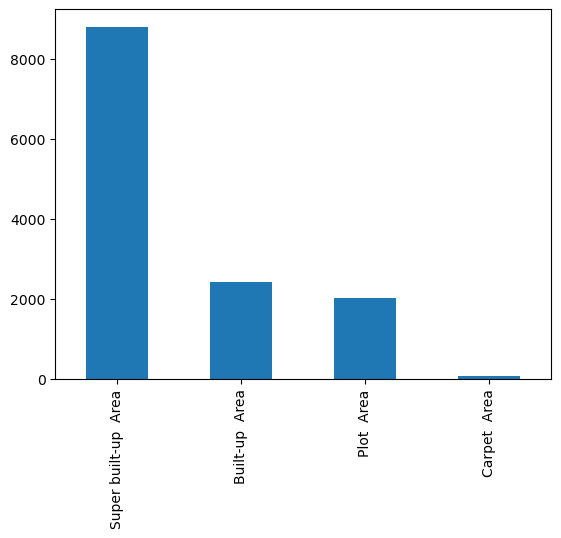

In [9]:
df.area_type.value_counts().plot(kind='bar')

<AxesSubplot:>

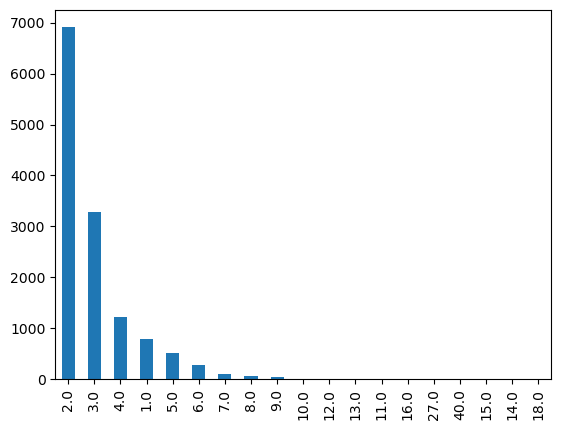

In [10]:
df.bath.value_counts().plot(kind='bar')

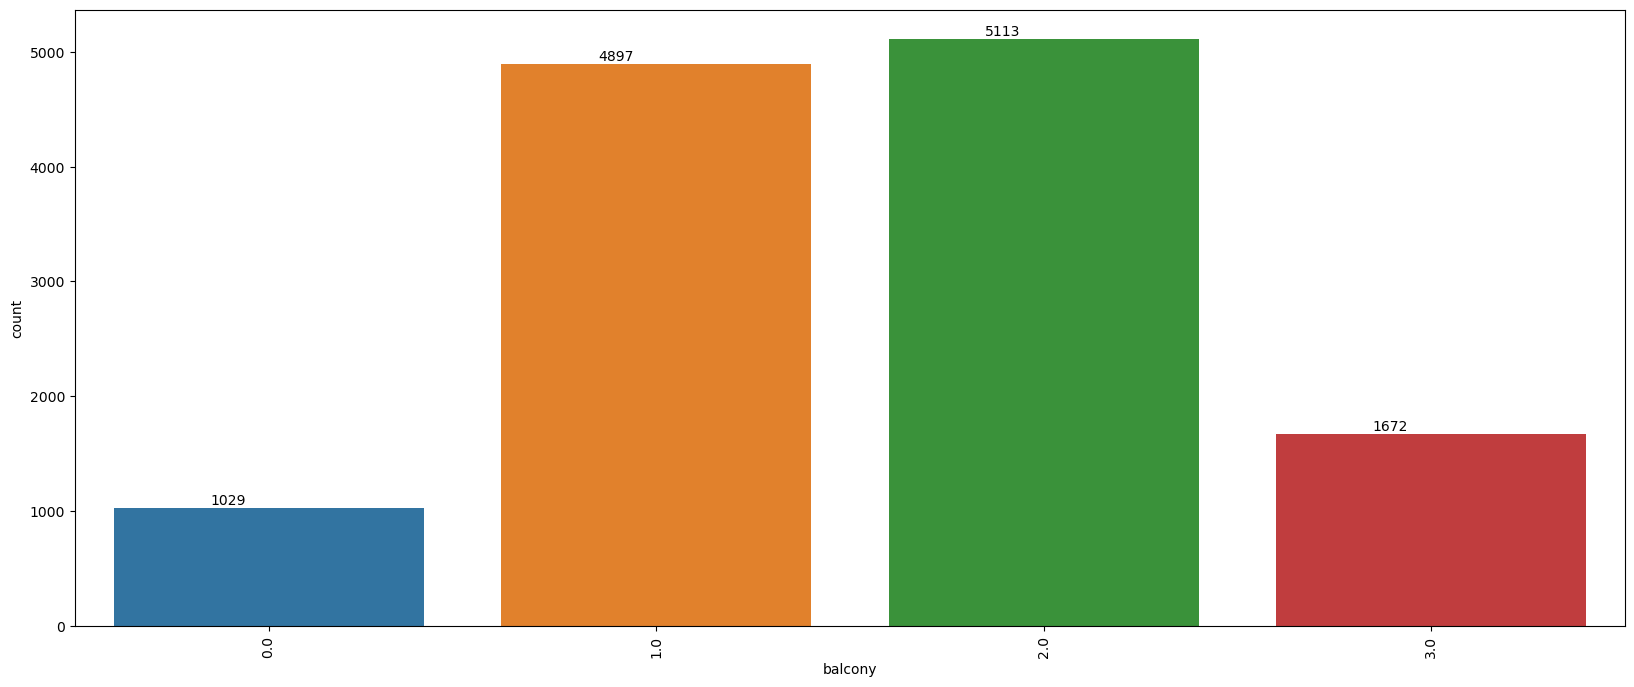

In [11]:
plt.figure(figsize = (20,8))
ax=snb.countplot(x = 'balcony' , data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1) , va = 'bottom', color='black')

In [12]:
counts = df.isna().sum()
print(counts.sort_values())

area_type          0
availability       0
total_sqft         0
price              0
location           1
size              16
bath              73
balcony          609
society         5502
dtype: int64


In [13]:
 df = df.drop(['area_type','society','balcony','availability'], axis = 'columns')
 df.shape

(13320, 5)

In [14]:
df = df.dropna()
df.shape

(13246, 5)

In [15]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df['BHK'] = df['size'].apply(lambda x: int(x.split(" ")[0]))

In [18]:
df.head(40)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


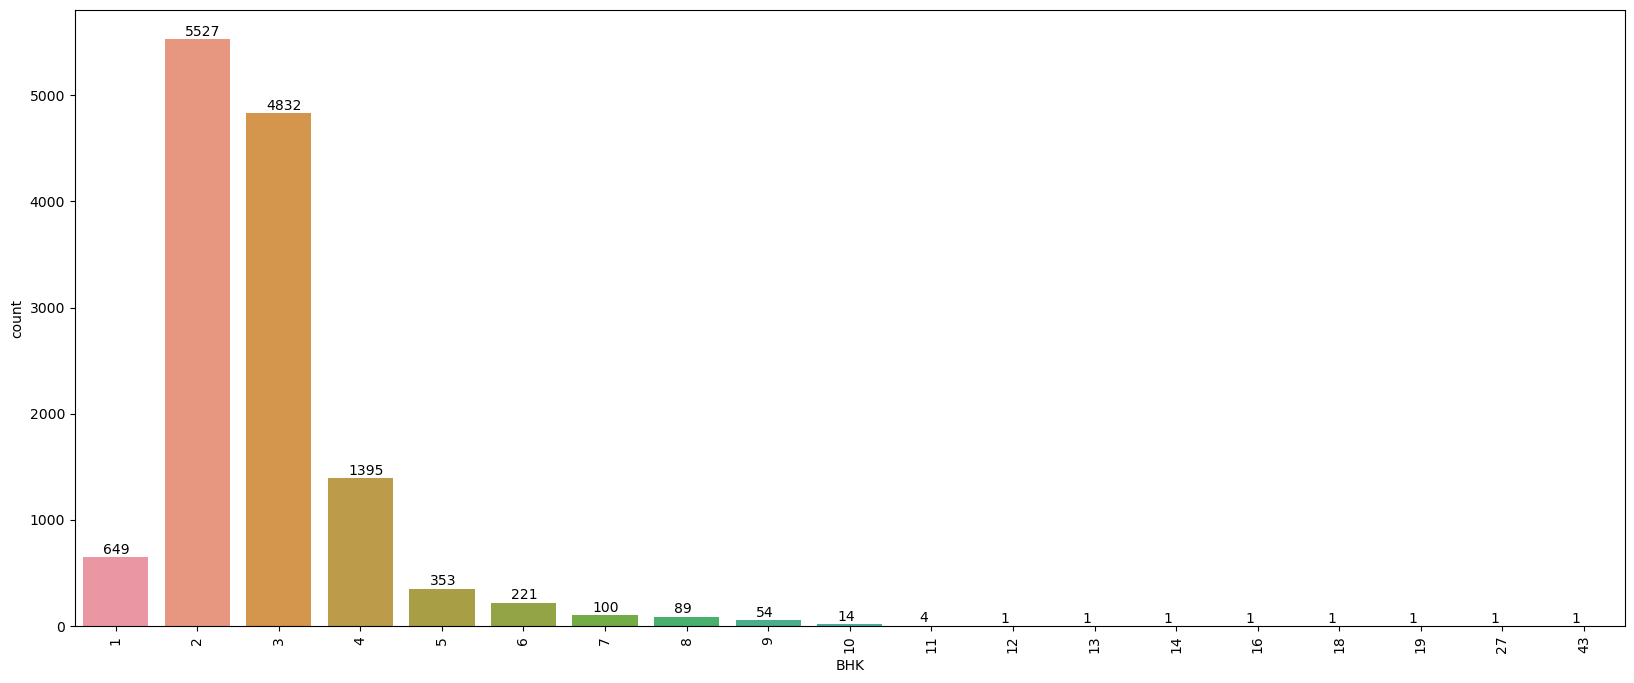

In [19]:
plt.figure(figsize = (20,8))
ax=snb.countplot(x = 'BHK' , data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1) , va = 'bottom', color='black')

In [20]:
df.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

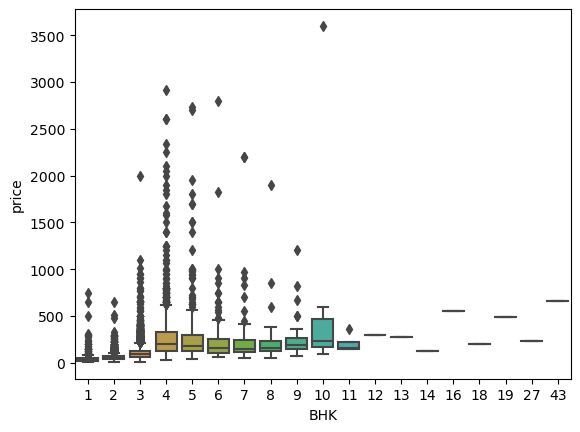

In [21]:
snb.boxplot(x = 'BHK', y = 'price', data=df)
plt.show()

In [22]:
f = df.total_sqft.unique()
len(f)

2067

Exploring total_sqft features

In [23]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [24]:
df[-df['total_sqft'].apply(is_float)].head(10)
nan_valuel = df[df.isna().any(axis=1)]
print(nan_valuel)

Empty DataFrame
Columns: [location, size, total_sqft, bath, price, BHK]
Index: []


In [25]:
df1 = df[-df['total_sqft'].apply(is_float)]
nan_valuel = df[df.isna().any(axis=1)]
print(nan_valuel)

Empty DataFrame
Columns: [location, size, total_sqft, bath, price, BHK]
Index: []


In [26]:
df.iloc[409:415]

,location,size,total_sqft,bath,price,BHK
413,Mahalakshmi Layout,6 Bedroom,1200,7.0,250.0,6
414,Kanakpura Road,3 BHK,1550,3.0,64.5,3
415,Amco Colony,3 BHK,1760,3.0,88.0,3
416,Billekahalli,2 BHK,1125,2.0,62.0,2
417,Nagarbhavi,3 Bedroom,1350,3.0,150.0,3
418,Anandapura,2 Bedroom,1000,2.0,55.0,2


In [27]:
def convert_sqft_to_number(x):
  tokens = x.split("-")
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [28]:
df = df.copy()
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_number)

nan_values = df[df.isna().any(axis=1)]
print(nan_values)

                                           location       size  total_sqft  \
410                                         Kengeri      1 BHK         NaN   
648                                         Arekere  9 Bedroom         NaN   
775                                    Basavanagara      1 BHK         NaN   
872                               Singapura Village      2 BHK         NaN   
1019                                 Marathi Layout  1 Bedroom         NaN   
1086                                     Narasapura  2 Bedroom         NaN   
1400                                     Chamrajpet      9 BHK         NaN   
1712                               Singena Agrahara  3 Bedroom         NaN   
1743                                      Hosa Road      3 BHK         NaN   
1821                                       Sarjapur  3 Bedroom         NaN   
2310                                     Whitefield      4 BHK         NaN   
2881                             Volagerekallahalli      2 BHK  

In [29]:
df = df.copy()
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


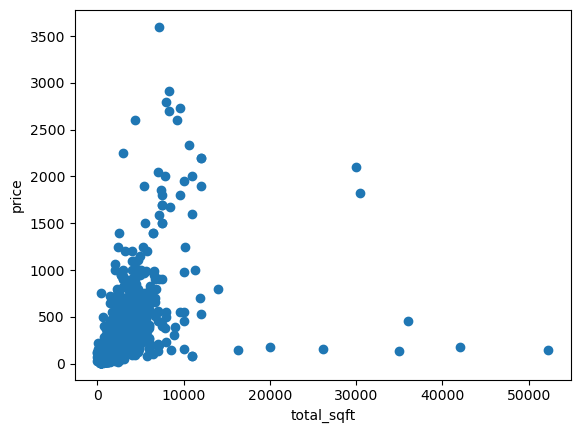

In [30]:
x = df['total_sqft']
y = df['price']

plt.scatter(x,y)

plt.xlabel('total_sqft')
plt.ylabel('price')

plt.show()

In [31]:
cols = df.columns

num_cols = df._get_numeric_data().columns

print("\n Numerical Columns \n", num_cols)

cata_col = list(set(cols) - set(num_cols))
print("\n Categorical columns \n",cata_col)


 Numerical Columns 
 Index(['total_sqft', 'bath', 'price', 'BHK', 'price_per_sqft'], dtype='object')

 Categorical columns 
 ['location', 'size']


In [32]:
len(df.location.unique())

1304

In [33]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [34]:
location_stats_less_than_20 = location_stats[location_stats<=20]
location_stats_less_than_20

Yelachenahalli                    20
Sanjay nagar                      20
HBR Layout                        20
Poorna Pragna Layout              20
Binny Pete                        20
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1150, dtype: int64

In [35]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_20 else x)
len(df.location.unique())

144

# Plotting Scatter Chart For 2 & 3 BHK properties


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from IPython.display import Image

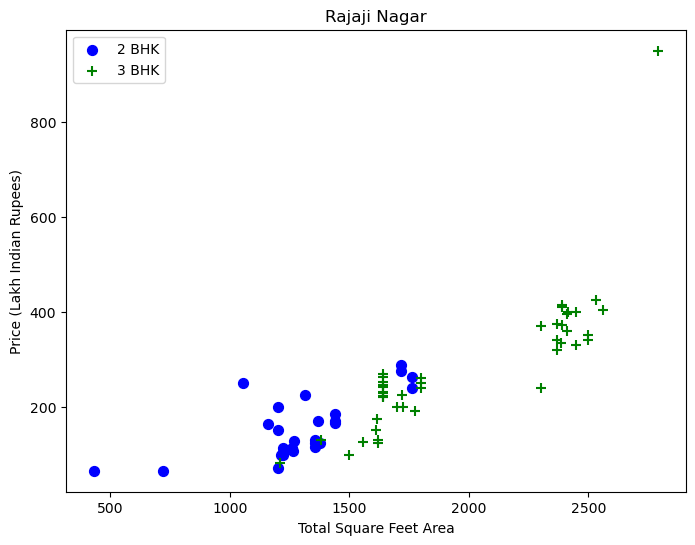

In [37]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

In [38]:
max(df["price_per_sqft"])

12000000.0

In [39]:
min(df["price_per_sqft"])

267.82981328435875

Text(0, 0.5, 'Count')

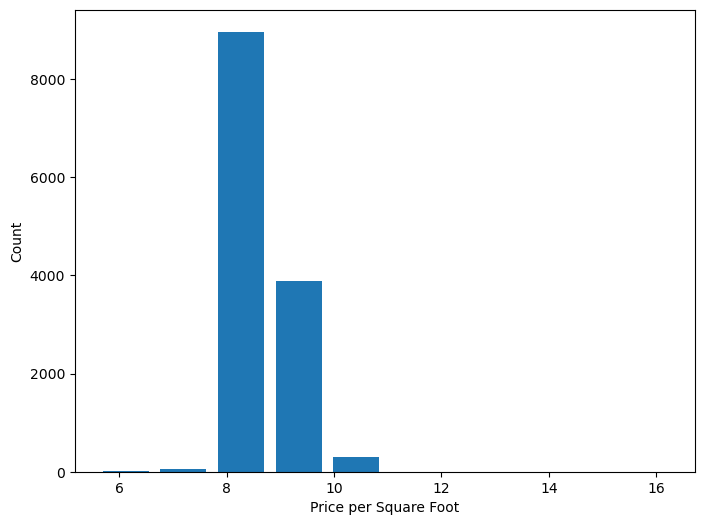

In [40]:
plt.hist(np.log(df.price_per_sqft),rwidth=0.8)
plt.xlabel("Price per Square Foot")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

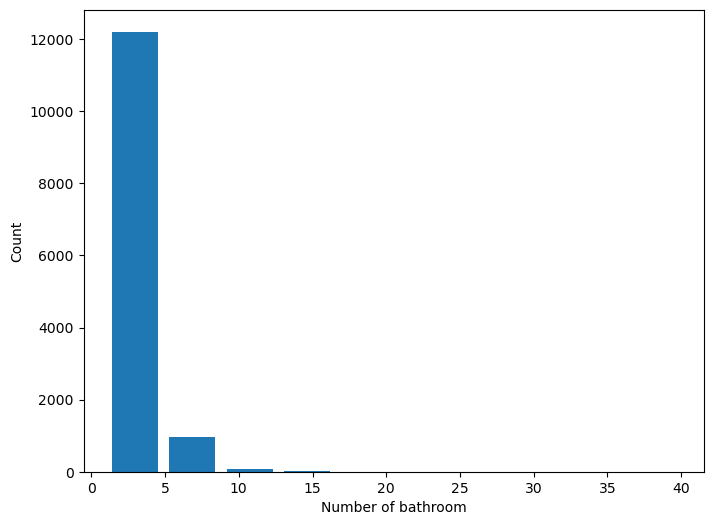

In [41]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathroom")
plt.ylabel("Count")

In [42]:
df[df.bath>10].head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
938,5th Phase JP Nagar,9 Bedroom,1260.0,11.0,290.0,9,23015.873016
1078,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1718,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
1768,other,11 Bedroom,1200.0,11.0,170.0,11,14166.666667
1953,KR Puram,8 Bedroom,1200.0,12.0,110.0,8,9166.666667
1979,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3379,other,19 BHK,2000.0,16.0,490.0,19,24500.000000
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
4684,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43,27500.000000


In [43]:
df[df.bath>df.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1078,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1953,KR Puram,8 Bedroom,1200.0,12.0,110.0,8,9166.666667
1979,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
6838,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
6937,other,9 Bedroom,2600.0,12.0,675.0,9,25961.538462
7709,other,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
8106,other,8 Bedroom,1850.0,12.0,300.0,8,16216.216216
9974,other,3 Bedroom,2400.0,6.0,775.0,3,32291.666667
9990,other,6 Bedroom,1200.0,9.0,122.0,6,10166.666667


# One Hot Encoding for Location

In [44]:
dummies = pd.get_dummies(df.location)
dummies.head()

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
data = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
data.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Selection

In [46]:
data = data.drop('location',axis='columns')

In [47]:
data = data.dropna()

In [48]:
X = data.drop(['price'],axis='columns')

In [49]:
X = X.drop(['size'],axis='columns')

In [50]:
X = X.drop(['price_per_sqft'],axis='columns')
X.head()

,total_sqft,bath,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X.shape

(13200, 146)

In [52]:
X.isna().sum()

total_sqft              0
bath                    0
BHK                     0
1st Phase JP Nagar      0
2nd Stage Nagarbhavi    0
                       ..
Vittasandra             0
Whitefield              0
Yelahanka               0
Yelahanka New Town      0
Yeshwanthpur            0
Length: 146, dtype: int64

In [53]:
y = data.price
y.shape

(13200,)

# Train Test Split

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
# from prettytable import PrettyTable

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)


LinearRegression()

In [57]:
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.4543536851575001


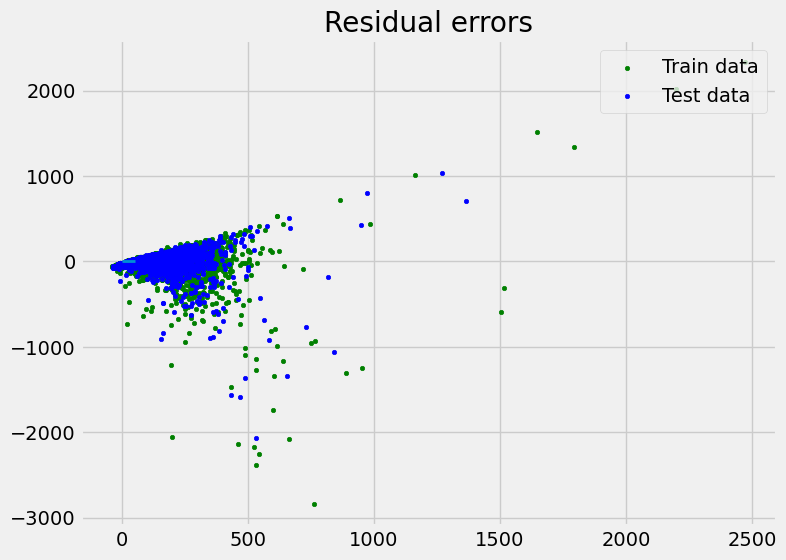

In [58]:
plt.style.use('fivethirtyeight')

plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
           color = 'green', s=10, label="Train data")

plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
           color = 'blue', s=10, label="Test data")

plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

plt.legend(loc = 'upper right')

plt.title("Residual errors")

plt.show()

In [59]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.617
Model:                            OLS   Adj. R-squared (uncentered):              0.611
Method:                 Least Squares   F-statistic:                              100.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):                        0.00
Time:                        16:59:59   Log-Likelihood:                         -57134.
No. Observations:                9240   AIC:                                  1.146e+05
Df Residuals:                    9094   BIC:                                  1.156e+05
Df Model:                         146                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [60]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return reg.predict([x])[0]

In [63]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


107.20457775473533

In [64]:
predict_price('Raja Rajeshwari Nagar',1000, 2, 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.114115390260878